# Lending Club Loan Analysis

LendingClub is America's largest online marketplace connecting borrowers and investors, facilitating personal loans, business loans, and financing for elective medical procedures and K-12 education and tutoring. 
Borrowers access lower interest rate loans through a fast and easy online or mobile interface. Investors provide the capital to enable many of the loans in exchange for earning interest. Cost savings are passed to borrowers in the form of lower rates and investors in the form of attractive returns. 

[LendingClub](https://www.lendingclub.com/)

[Kaggle Dataset](https://www.kaggle.com/wendykan/lending-club-loan-data/downloads/lending-club-loan-data.zip/1)

## Business Workflow
 
 
__Borrowers__
1. Apply for loans.
2. Get funded.
3. Repay automatically.

__Investors__
1. Open an account.
2. Build a portfolio.
3. Earn and reinvest.

## Setup

In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # data visualization
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import researchpy as rp
from sklearn.preprocessing import LabelEncoder

# Models
from sklearn.model_selection import train_test_split
from sklearn import metrics
# from sklearn.linear_model import LinearRegression # Linear Regression
from sklearn.svm import SVC # Support Vector Machines (SVM)
from sklearn.naive_bayes import GaussianNB # Naive Bayes
from sklearn import neighbors # KNN
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor # Random Forests
from sklearn.tree import DecisionTreeRegressor # Decision Trees
from scitime import Estimator
import time

matplotlib.pyplot:DEBUG:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


## Data Processing

In [2]:
df = pd.read_csv('loan.csv', low_memory = False)
shape = str(df.shape)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 145 entries, id to settlement_term
dtypes: float64(105), int64(4), object(36)
memory usage: 2.4+ GB


In [27]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,dti,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,0.0,2.258957e+06,...,10613.0,10613.000000,10613.0,10613.000000,8426.000000,10613.000000,10613.000000,33056.000000,33056.000000,33056.000000
mean,NaN,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309291e+01,4.458076e+02,7.799243e+04,NaN,1.882420e+01,...,3.0,155.006696,3.0,13.686422,454.840802,11628.036442,193.606331,5030.606922,47.775600,13.148596
std,NaN,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832114e+00,2.671737e+02,1.126962e+05,NaN,1.418333e+01,...,0.0,129.113137,0.0,9.728138,375.830737,7615.161123,198.694368,3692.027842,7.336379,8.192319
min,NaN,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,NaN,-1.000000e+00,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,NaN,1.189000e+01,...,3.0,59.370000,3.0,5.000000,174.967500,5628.730000,43.780000,2227.000000,45.000000,6.000000
50%,NaN,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,NaN,1.784000e+01,...,3.0,119.040000,3.0,15.000000,352.605000,10044.220000,132.890000,4172.855000,45.000000,14.000000
75%,NaN,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,NaN,2.449000e+01,...,3.0,213.260000,3.0,22.000000,622.792500,16114.940000,284.180000,6870.782500,50.000000,18.000000
max,NaN,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,NaN,9.990000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


## Data Visualization

### Distribution of Loans and Funds

C:\Users\oandr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Total committed by Investors')

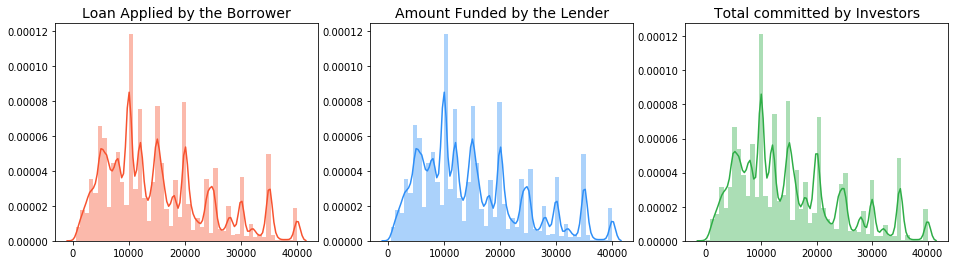

In [28]:
# Build a ditribution plot
fig, ax = plt.subplots(1, 3, figsize=(16,4))

loan_amount = df["loan_amnt"].values
funded_amount = df["funded_amnt"].values
investor_funds = df["funded_amnt_inv"].values

sns.distplot(loan_amount, ax=ax[0], color="#F7522F")
ax[0].set_title("Loan Applied by the Borrower", fontsize=14)
sns.distplot(funded_amount, ax=ax[1], color="#2F8FF7")
ax[1].set_title("Amount Funded by the Lender", fontsize=14)
sns.distplot(investor_funds, ax=ax[2], color="#2EAD46")
ax[2].set_title("Total committed by Investors", fontsize=14)

- The loans applied by borrowers, the amount issued to the borrowers and the amount funded by investors are similarly distributed. As a result, it is most likely that __borrowers will get the loan they applied for__.

### Loans Issued by Year

In [3]:
# Get issued date YYYY
df["issue_d"].values
df_date = pd.to_datetime(df["issue_d"])
df['year'] = df_date.dt.year

Text(0, 0.5, 'Loan Amount')

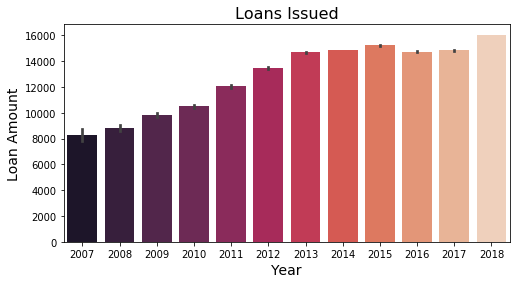

In [30]:
# Build a bar chart
#f, (ax) = plt.subplots(3, 1, figsize=(7, 5), sharex=True)
plt.figure(figsize=(8,4))
sns.barplot(x="year", y="loan_amnt", data=df, palette = "rocket")

plt.title('Loans Issued', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Loan Amount', fontsize=14)

- __2018__ was the year __most loans__ were issued, boosted by the U.S. GDP growth on Q2.
- Loans __increased incrementally until 2015__, most likely due to the U.S. economy recovery act.
- Between 2015 and 2018 the GDP was fairly constant, as shown by the __similar loan amounts issued on 2016 and 2017__.

### Loan Length by Year

Text(0, 0.5, 'Length of Loans')

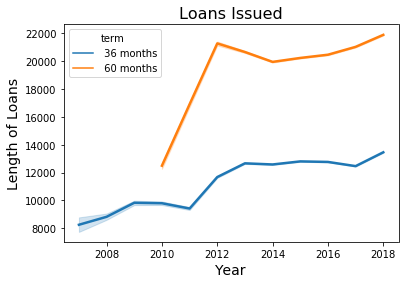

In [31]:
# Check loan leangth
df["term"].values

# Build a line plot
sns.lineplot(x="year", y="loan_amnt", hue="term", data=df, palette="tab10", linewidth=2.5)

plt.title('Loans Issued', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Length of Loans', fontsize=14)

- __Long term loans were unavailable until 2010__, most likely due to the impact of the 2007-2008 financial crisis and succeeding U.S. economy recovery.
- The __demand for long term loans is much higher__ than short term loans.
- __2012 was the peak of long term loans__ issued. Between 2010 and 2012 the long term loans increased drastically, most likely due to the GDP boost and the availability of long term options to borrowers.
- __Short term loans also increased after 2011__, reinforcing the fact that the U.S. economy was blooming after the financial crisis.

### Loan Status

In [4]:
# Check distinct status to classify a loan
df.loan_status.unique()

# Create new column to flag different loan types
df.loc[(df.loan_status == 'Current') | (df.loan_status == 'Fully Paid'), 'class'] = 'Good'
df.loc[(df.loan_status != 'Current') & (df.loan_status != 'Fully Paid'), 'class'] = 'Bad'

#Debug
print(df.loan_status.loc[df["class"]=="Good"].unique())
print(df.loan_status.loc[df["class"]=="Bad"].unique())

['Current' 'Fully Paid']
['Late (31-120 days)' 'In Grace Period' 'Charged Off' 'Late (16-30 days)'
 'Default' 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off']


 __Good Loans__
 - Current
 - Fully Paid
 
 
 __Bad Loans__
 - Default
 - Late (31-120 days)
 - Charged Off
 - Late (16-30 days)
 - In Grace Period
 - Does not meet the credit policy. Status:Charged Off
 - Does not meet the credit policy. Status:Fully Paid

Text(0.5, 0, 'Loan Class')

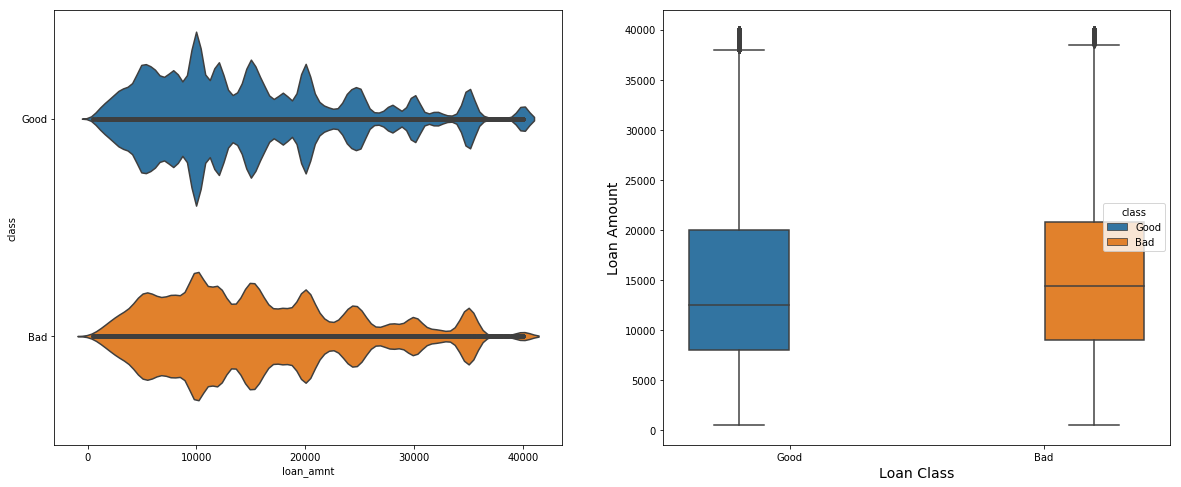

In [33]:
f, ax = plt.subplots(1,2,figsize=(20, 8))

sns.violinplot(y="class", x="loan_amnt", data=df, palette="tab10", inner="points", ax = ax[0])
plt.xlabel('Loan Amount', fontsize=14)
plt.ylabel('Loan Class', fontsize=14)

sns.boxplot(x="class", y="loan_amnt", hue="class", palette="tab10", data=df,ax = ax[1])
plt.ylabel('Loan Amount', fontsize=14)
plt.xlabel('Loan Class', fontsize=14)

## Model

### Feature Selection

Feature selection is one of the first and important steps while performing any machine learning task. In a dataset not necessarily every column (feature) is going to have an impact on the output variable. These irrevelant features cannot be added to the model, as it would decrease the accuracy.


#### Filter Method

This method filters the subset of the relevant features. The model is built after selecting the features. The filtering here is done using correlation matrix and it is most commonly done using Pearson correlation.
 
The correlation coefficient has values between -1 to 1:
- A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
- A value closer to 1 implies stronger positive correlation
- A value closer to -1 implies stronger negative correlation

In [5]:
# Turn features grade and class into numeric values
label_make = LabelEncoder()
df['class_code'] = label_make.fit_transform(df['loan_status'])
df['grade_code'] = label_make.fit_transform(df['grade'])
df['purpose_code'] = label_make.fit_transform(df['purpose'])

#df[['class_code','class']]
#df[['grade_code','grade']]

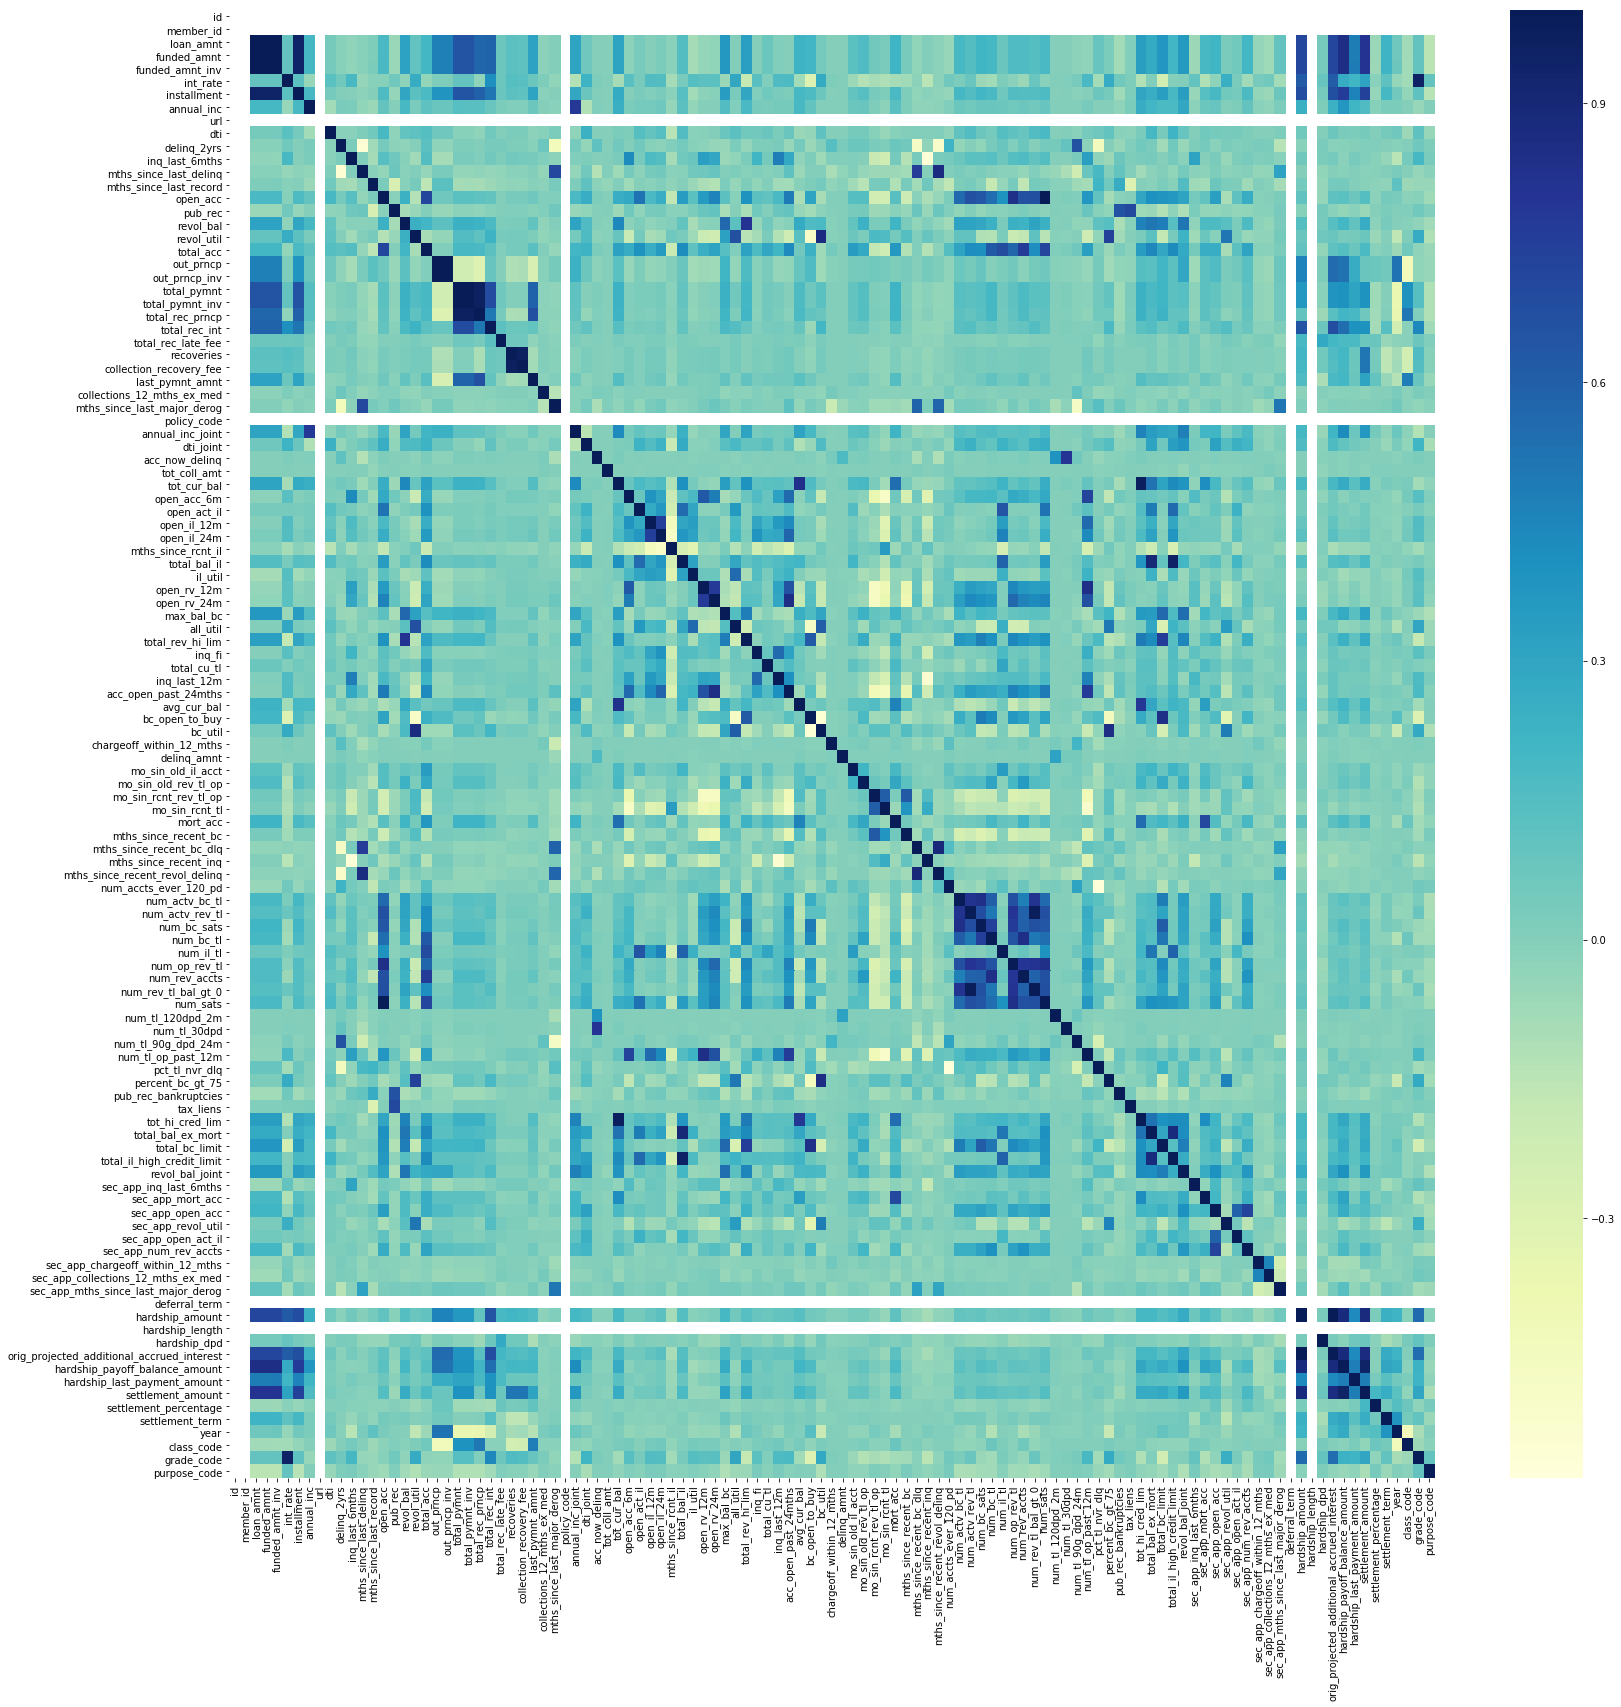

In [35]:
correlation_matrix = df.corr()

f, ax = plt.subplots(figsize=(27, 27))

sns.heatmap(correlation_matrix, annot=False, cmap='YlGnBu')

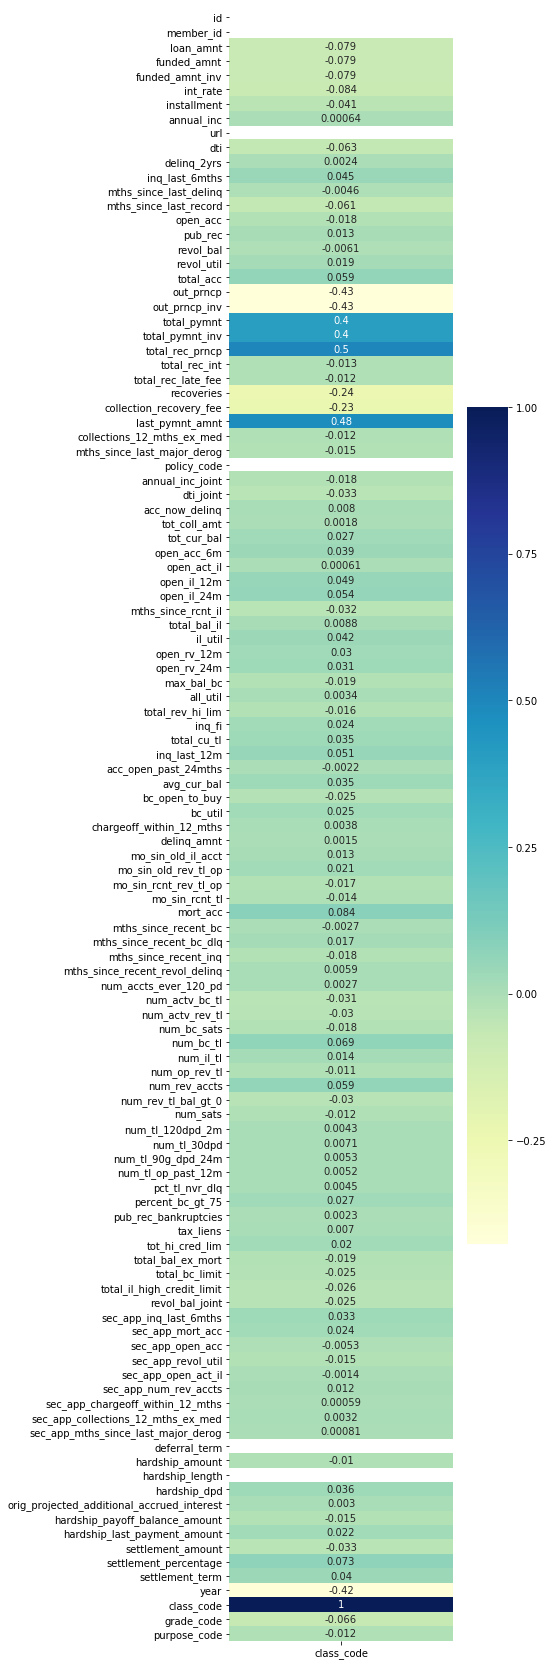

In [36]:
#correlation_matrix["loan_amnt"].sort_values(ascending=False)
f, ax = plt.subplots(figsize=(5, 30))
sns.heatmap(correlation_matrix[["class_code"]], annot=True, cmap='YlGnBu')

In [37]:
cor_target = abs(correlation_matrix["class_code"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5].sort_values(ascending = False)
relevant_features

class_code         1.000000
total_rec_prncp    0.501559
Name: class_code, dtype: float64

- The only feature that meets the correlation target is the __principal amount received to date__, as it is directly connected to the __repayment__ which determines the loan status.

- __A machine learning model only based on the amount repaid would not be consistent to predict the loan status.__ Therefore, the correlation of the selected feature must be checked.

In [38]:
cor_target = abs(correlation_matrix["total_rec_prncp"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1].sort_values(ascending = False)
relevant_features

total_rec_prncp                               1.000000
total_pymnt                                   0.967017
total_pymnt_inv                               0.966391
last_pymnt_amnt                               0.668926
installment                                   0.597191
loan_amnt                                     0.578036
funded_amnt                                   0.577948
funded_amnt_inv                               0.576995
total_rec_int                                 0.501711
class_code                                    0.501559
year                                          0.351760
out_prncp                                     0.295185
out_prncp_inv                                 0.295177
tot_hi_cred_lim                               0.237700
tot_cur_bal                                   0.228060
total_bc_limit                                0.226131
revol_bal                                     0.223675
mort_acc                                      0.221960
max_bal_bc

- As expected, feature directly connected to the repayment conditions are highly correlated to the amount received.
- Nevertheless, there are more features with a positive/negative correlation than before. Those features are directly connected to the borrower, providing a greater input when predicting the loan status:
    - __installment__ - loan installment
    - __loan_amnt__ - loan amount
    - __year__ - loan issue year
    - __tot_cur_bal__ - total current balance of all accounts
    - __mort_acc__ - number of mortgage accounts
    - __annual_inc__ - the self-reported annual income provided by the borrower during registration

### Model Creation

In [49]:
df_ml = df[['installment', 'loan_amnt','year','tot_cur_bal','mort_acc','annual_inc','class_code']]

# Check for NaN and infinite values
#print(np.any(np.isnan(df_ml))) 
print(pd.isnull(df_ml).any())
#print(np.all(np.isfinite(df_ml)))

# Replace infinites with NaN
df_ml = df_ml.replace([np.inf, -np.inf], np.nan)

# Drop null values
df_ml = df_ml.dropna()

# Debug
#print(np.any(np.isnan(df_ml))) 
print(pd.isnull(df_ml).any())
#print(np.all(np.isfinite(df_ml)))

X = df_ml[['installment', 'loan_amnt','year','tot_cur_bal','mort_acc','annual_inc']]
y = df_ml['class_code']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

df_ml.info()

installment    False
loan_amnt      False
year           False
tot_cur_bal     True
mort_acc        True
annual_inc      True
class_code     False
dtype: bool
installment    False
loan_amnt      False
year           False
tot_cur_bal    False
mort_acc       False
annual_inc     False
class_code     False
dtype: bool
(2190392, 6)
(2190392,)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2190392 entries, 0 to 2260667
Data columns (total 7 columns):
installment    float64
loan_amnt      int64
year           int64
tot_cur_bal    float64
mort_acc       float64
annual_inc     float64
class_code     int64
dtypes: float64(4), int64(3)
memory usage: 133.7 MB


In [50]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1314235, 6)
(1314235,)
(876157, 6)
(876157,)


#### KNN - k-nearest neighbors 

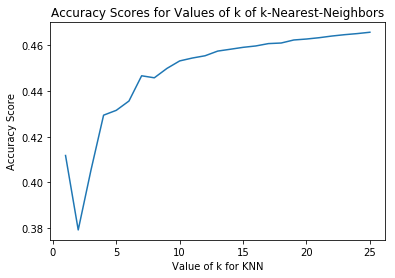

In [42]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []


for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

# print(max.k_range)
# print(max.scores) 
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [55]:
# k=25
knn = neighbors.KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
score_knn = (metrics.accuracy_score(y_test, y_pred))
#mae_knn = mean_absolute_error(y_test, y_pred)
print(score_knn)
#print(mae_knn)

0.4656893684579362


#### Naive Bayes

In [57]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
score_gnb = metrics.accuracy_score(y_test, y_pred)
mae_gnb = mean_absolute_error(y_test, y_pred)
print(score_gnb)
#print(mae_gnb)

0.4761989004253804


#### Random Forest

In [52]:
rf = RandomForestRegressor(random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
score_rf = metrics.accuracy_score(y_test, y_pred.round())
#mae_rf = mean_absolute_error(y_test, y_pred)
print(score_rf)
# print(mae_rf)

0.24706873311518368


#### Decision Trees

In [54]:
dt = DecisionTreeRegressor(random_state=1)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
score_dt = metrics.accuracy_score(y_test, y_pred.round())
#mae_dt = mean_absolute_error(y_test, y_pred)
print(score_dt)
#print(mae_dt)

0.5922203440707544


- The accuracy score of all models was not very high, as only one model reached the 0.5 target
- The Decision Tress algorithm is the most accurate model to predict the loan status class based on the selected features
- The mean absolute error is useless to this analysis, as this is a classification problem to predict a category instead of a measure 